In [1]:
import os
os.chdir(os.getcwd())

In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
df_train.head()

,bip_id,game_date,home_team,away_team,batter_team,batter_name,pitcher_name,batter_id,pitcher_id,is_batter_lefty,...,inning,outs_when_up,balls,strikes,plate_x,plate_z,pitch_mph,launch_speed,launch_angle,is_home_run
0,1,2020-08-26,ARI,COL,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,0,1,2,-0.15,1.97,87.8,108.9,9.0,0
1,2,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,1,1,3,1,-0.71,2.88,95.2,NaN,18.0,0
2,3,2020-08-10,COL,ARI,COL,"arenado, nolan","ray, robbie",571448,592662,0,...,3,0,1,2,-0.54,1.75,86.5,75.0,49.0,0
3,4,2020-08-26,ARI,COL,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,0,0,2,-0.42,3.15,86.7,90.6,54.0,0
4,5,2020-08-10,COL,ARI,COL,"blackmon, charlie","ray, robbie",453568,592662,1,...,1,1,1,0,0.18,3.27,96.1,NaN,6.0,0


In [3]:
X_train = df_train[['plate_x','plate_z', 'pitch_name']].values
Y_train = df_train['is_home_run'].values

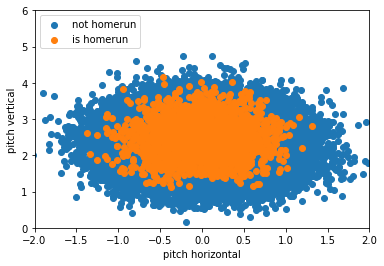

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_train[Y_train == 0, 0],
            X_train[Y_train == 0, 1], 
            label='not homerun',)
plt.scatter(X_train[Y_train == 1, 0],
            X_train[Y_train == 1, 1], 
            label='is homerun',)

plt.xlabel('pitch horizontal')
plt.ylabel('pitch vertical')
plt.xlim([-2, 2])
plt.ylim([0, 6])
plt.legend(loc='upper left')
plt.show()

In [5]:
df_train["same_hand_players"] = np.where(df_train['is_batter_lefty'] == df_train['is_pitcher_lefty'], 1, 0)

In [6]:
from sklearn.model_selection import train_test_split
feature_columns = ['same_hand_players','plate_x','plate_z', 'pitch_name']
X = df_train[feature_columns]
dict = {"4-Seam Fastball": 1, 
        "Sinker": 2, 
        "Slider": 3, 
        "Changeup": 4, 
        "Curveball": 5, 
        "Cutter": 6, 
        "Knuckle Curve": 7,
        "Split-Finger": 8,
        "Forkball": 9}
X = X.replace({'pitch_name': dict})
y = df_train.is_home_run

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1, stratify=y)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)
params = {
    'min_samples_split': [3, 4, 5],
    'max_depth': [2, 4, 6, 16, 32]
}
grid = GridSearchCV(estimator=tree,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)
grid.fit(X_train, y_train)
grid.best_score_

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END ...................max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=2, min_s

[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................max_depth=16, min_samples_split=5; total time=   0.0s
[CV] END ..................m

0.9470806302131605

In [8]:
grid.best_params_

{'max_depth': 2, 'min_samples_split': 3}

In [9]:
print(f"Training Accuracy: {grid.best_estimator_.score(X_train, y_train)*100:0.3f}")
print(f"Test Accuracy: {grid.best_estimator_.score(X_test, y_test)*100:0.3f}")

SyntaxError: unexpected EOF while parsing (<ipython-input-9-ff4f5d5b978e>, line 2)

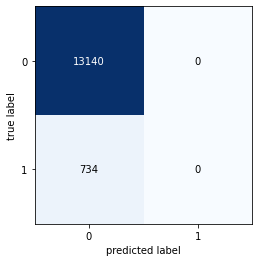

In [10]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_target=y_test, 
                      y_predicted=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()